# **AISaturdays Rental Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de **AISaturdays** de Inteligencia Artificial para la predicci�n de precios de rentals de los barrios de una ciudad. En este ejercicio estimaremos el precio de una oferta de alquiler, dependiendo de unos datos descritos m�s abajo.

**Instrucciones:**

- Se usar� el lenguaje de programaci�n Python 3.
- Se usar�n las librer�as de python: Pandas, MatPlotLib, Numpy.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librer�as adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la informaci�n del dataset.
 - Limpiar y normalizar la informaci�n del dataset.
 - Representar y analizar la informaci�n del dataset.
- Aplicar el algoritmo de Random Forest
- Mejorar la predicci�n usando Hyperparameter Tunning, Feature engineering y Gradient Boosting

�Empecemos!


#1.Importaci�n de librerias 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

#2. Dataset

0. Lee el .csv con los datos y muestra las primeras filas.

In [2]:
#Dos lineas de c�digo
data=pd.read_csv('data.csv')
print (data.head(2))

   Unnamed: 0        id                                 name   host_id  \
0       35706  28341280                 Bushwick Rustic Loft  10812370   
1        2434   1213991  Private 2 bedroom Midtown Manhattan   6626827   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0        Al            Brooklyn        Bushwick  40.69987  -73.91821   
1     Steve           Manhattan  Hell's Kitchen  40.76247  -73.99294   

      room_type  minimum_nights  number_of_reviews last_review  \
0  Private room               1                 28  2019-07-07   
1  Private room               4                 77  2019-06-19   

   reviews_per_month  calculated_host_listings_count  availability_365  price  
0               2.75                               1                36     69  
1               1.81                               1                21    240  


1. Muestra el numero de features y ejemplos en el dataset.

In [3]:
# S�lo con una l�nea de c�digo
print (data.shape)

(32759, 17)


2. Obt�n que tipos de datos (dtypes) contiene el dataset.

In [4]:
# S�lo con una l�nea de c�digo
print (data.dtypes)


Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object


### Variables



* **Id/name:**  Identificador y nombre de la oferta.

* **host_id/host_name:** Identificador y nombre del anfitri�n.

* **neighbourhood_group/neighbourhood:** Zona y barrio de la oferta. Cada zona es una agrupaci�n de barrios.
* **latitude/longitude:** Latitud y longitud de la oferta.

* **room_type:** Que tipo de habitaci�n se oferta. Puede ser el apartamento o casa entero, una habitaci�n privada o una compartida.

* **minimum_nights:**  Noches de estancia m�nima.

* **number_of_reviews:**  N�mero total de reviews de la oferta.

* **last_review:**  Fecha de la �ltima review hecha.

* **reviews_per_month:** N�mero de reviews por mes. No siempre es entero y la mayor�a son menos de 1.

* **calculated_host_listings_count:** Cuantas habitaciones tiene el host en oferta.

* **availability_365:** La disponibilidad de la oferta en un a�o: m�ximo de 365 (todo el a�o en oferta)

* **price:** �Nuestro objetivo!. El precio de la oferta, en dolares.



�Es este un problema de regression o de classification? �Por que?: regresión, pues se pretende calcular el valor de una variable continua, no clasificar en categorías.

3. Antes de analizar el dataset, tenemos que transformar las fechas (la feature last_review) en algo con lo que podamos trabajar. Pandas tiene un data type espec�ficamente para esto, datetime. Transforma last_review a formato datetime.

In [5]:
# S�lo con una l�nea de c�digo
data['last_review']=pd.to_datetime(data['last_review'])


4. Para analizar los datos tambi�n necesitamos saber cuanta informaci�n nos falta. Utiliza isnull() para averiguar a que feature le faltan mas datos. 

In [6]:
# S�lo con una l�nea de c�digo
pd.isnull(data).sum()


Unnamed: 0                           0
id                                   0
name                                 4
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       6772
reviews_per_month                 6772
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

5. Finalmente, solo nos falta deshacernos de las features que solo sirven de identificador y no ayudan a predecir.

In [7]:
# S�lo con una l�nea de c�digo
data.drop(['Unnamed: 0', 'id'], axis=1,inplace=True)

6. �Todo listo! Ya podemos analizar la distribuci�n de los datos con la funci�n .describe()

In [8]:
# S�lo con una l�nea de c�digo
data.describe()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,3.275900e+04,32759.000000,32759.000000,32759.000000,32759.000000,25987.000000,32759.000000,32759.000000,32759.000000
mean,6.776458e+07,40.728968,-73.952465,7.131475,23.240911,1.383150,7.223175,113.116090,154.312983
std,7.874515e+07,0.054479,0.045704,21.236959,44.354050,1.699714,33.275291,131.687842,256.571284
min,2.438000e+03,40.499790,-74.240840,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,7.831209e+06,40.690150,-73.983130,1.000000,1.000000,0.190000,1.000000,0.000000,69.000000
50%,3.078984e+07,40.723180,-73.955800,3.000000,5.000000,0.730000,1.000000,45.000000,107.000000
75%,1.074344e+08,40.763155,-73.936540,5.000000,24.000000,2.030000,2.000000,226.000000,178.000000
max,2.743213e+08,40.913060,-73.712990,1250.000000,607.000000,58.500000,327.000000,365.000000,10000.000000


### Limpiar y normalizar la informaci�n del dataset
![texto alternativo](https://i.imgur.com/8u4xTI7.png)

Este dataset contiene informaci�n incompleta que debemos rellenar para poder usarla a la hora de predecir el precio de las ofertas.
Tambi�n tenemos que transformar last_review si queremos incluirla en la predicci�n (no podemos utilizar una fecha como input directamente).

Para esta limpieza usaremos varias funciones de Pandas. Aqu� teneis una [pista](https://new.paradigmadigital.com/wp-content/uploads/2019/02/Pandas_cheatsheet.pdf).

7. Encuentra el n�mero de ofertas que por no tener reviews no tienen informaci�n en las columnas de last_review y reviews_per_month.

In [9]:
# S�lo con una l�nea de c�digo
data[data['last_review'].isnull()]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
8,Apartment at the St.Regis Hotel,50397134,Masaichi,Manhattan,Midtown,40.76103,-73.97512,Entire home/apt,1,0,NaT,NaN,1,0,1200
10,Comfortable Room in large 3 BED Apt,58104904,Michael,Brooklyn,Bushwick,40.70146,-73.91763,Private room,7,0,NaT,NaN,1,0,55
11,Great Location 1 BR Apt - Manhattan,52559052,Abe,Manhattan,Midtown,40.76657,-73.98207,Entire home/apt,2,0,NaT,NaN,1,0,150
12,Demo listing - not real,137447960,Rohit,Queens,Astoria,40.76495,-73.92529,Entire home/apt,18,0,NaT,NaN,1,178,70
13,Private place. Close to everything NY has to o...,248021206,Alen,Queens,Glendale,40.70710,-73.86482,Private room,1,0,NaT,NaN,1,177,50
14,Great access/2min U can use 5 lines(EFMR7),200239515,Shogo,Queens,Woodside,40.74652,-73.89154,Private room,28,0,NaT,NaN,15,0,28
19,Floorthru Two Bed & Private Yard,438545,Christie,Brooklyn,Carroll Gardens,40.68276,-74.00016,Entire home/apt,4,0,NaT,NaN,1,0,275
21,Central Park South Classic Junior Suite,34693688,Darwin Dion,Manhattan,Midtown,40.76411,-73.98074,Entire home/apt,3,0,NaT,NaN,1,0,400
33,Large bedroom with PRIVATE bathroom and KING Bed,13463652,Rueben,Brooklyn,Clinton Hill,40.68399,-73.96465,Private room,5,0,NaT,NaN,1,0,125
39,Entire 3 Bedroom apt next to Barclay’s center,229381517,Pavel,Brooklyn,Prospect Heights,40.68077,-73.97489,Entire home/apt,1,0,NaT,NaN,2,175,250


8. Tenemos que completar esta informaci�n si no queremos eliminar el resto del ejemplo. Rellena todos los NaNs de las reviews_per_month con 0 (Completaremos la columna de last_review despu�s).

In [10]:
# S�lo con una l�nea de c�digo 
data['reviews_per_month'].fillna(0, inplace=True)


9. Vamos a transformar la variable last_review. Es una fecha, lo cual nos hace dificil trabajar con ella. Vamos primero a completar los ejemplos que no tienen una �ltima fecha. Reemplaza estos NaNs con la primera review hist�rica del dataset.

In [11]:
# Dos lineas de c�digo 
data['last_review'].fillna(data['last_review'].min(), inplace=True)


10. Ahora que no tenemos valores vacios podemos cambiar la variable last_review a algo mas util. Buscamos que valores mas peque�os correspondan a reviews antiguas o que no hayan tenido ninguna, mientras que valores mas grandes correspondan a reviews mas recientes. 

Podemos utilizar la funci�n toordinal() para hayar el n�mero de dias que han transcurrido desde el dia 1 del a�o 1, pero esos siguen siendo n�meros demasiado grandes que no siguen la distribuci�n que buscamos.

Consigue que last_reviews pase a representar la cantidad de dias que han transcurrido desde que se hizo la primera review hist�rica. 

In [12]:
# Solo una l�nea de c�digo
data['last_review'].apply(lambda x: x.toordinal())

0        737247
1        737229
2        737219
3        737228
4        737232
5        737240
6        737239
7        737237
8        734252
9        737219
10       734252
11       734252
12       734252
13       734252
14       734252
15       736926
16       737233
17       737210
18       737066
19       734252
20       736905
21       734252
22       737225
23       737215
24       737241
25       737219
26       737058
27       737188
28       737246
29       737236
          ...  
32729    735796
32730    737199
32731    737191
32732    737225
32733    737241
32734    737231
32735    734252
32736    737219
32737    736792
32738    737209
32739    737231
32740    737241
32741    737240
32742    737205
32743    736906
32744    736208
32745    737226
32746    734252
32747    736129
32748    734252
32749    734252
32750    737222
32751    734252
32752    734252
32753    737245
32754    734252
32755    737240
32756    737161
32757    737219
32758    736134
Name: last_review, Lengt

11. Para visualizar la distribuci�n de las fechas, genera una gr�fica que muestre la variable last_reviews.

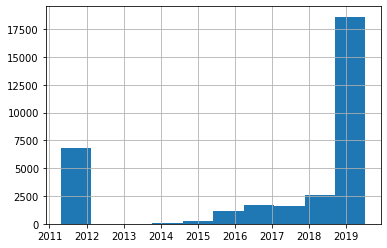

In [13]:
# Solo una l�nea de c�digo
data['last_review'].hist()


Parece que hay dos grupos muy distinguidos. �A que se debe esta distribuci�n?:a todas las fechas nulas que hemos ajustado a la fecha más antigua

#### Estudio de la variable a predecir y eliminaci�n de ruido

12. A la hora de predecir el precio, es mucho mas favorable si primero transformamos y analizamos la variable que buscamos para hacerla mas facil de predecir.

Primero, vamos a ver como el precio de las ofertas est� distribuido. Genera una gr�fica que muestre el precio de las ofertas. Aqu� tienes una [Pista](https://seaborn.pydata.org/generated/seaborn.distplot.html).

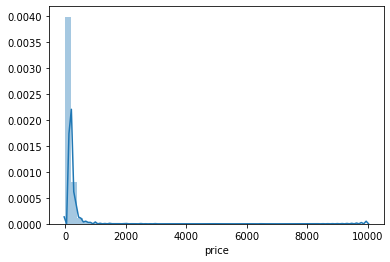

In [14]:
# Solo una l�nea de c�digo.
sns.distplot(data['price'])

Tenemos una variable que sigue una distribuci�n log-normal. Podemos transformarla en una distribuci�n normal aplicando log1p(), una funci�n que responde a la siguiente ecuaci�n:

$ y = log(x+1) $

Esto hace que el precio sea mas facil de predecir, al tener una distribuci�n normal.

13. Vamos a visualizar esta transformaci�n. Genera otra gr�fica de price tras aplicar la funci�n log1p().

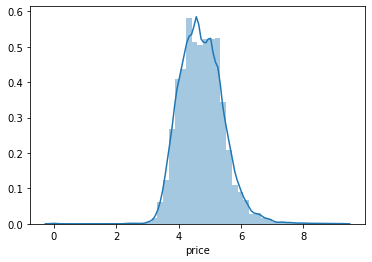

In [15]:
#Solo una l�nea de c�digo
sns.distplot(np.log1p(data['price']))

Ahora tenemos una distribuci�n mucho mas apropiada para hacer predicciones. Sin embargo, todav�a quedan muchos outliers que a�aden ruido a la muestra.

14. �Por encima y debajo de qu� valores esta presente este ruido?. Elimina del dataframe aquellos valores que no entren en la distribuci�n normal.

In [16]:
#Dos lineas de c�digo
q_low = data["price"].quantile(0.01)
q_hi  = data["price"].quantile(0.99)

data_filtered = data[(data["price"] < q_hi) & (data["price"] > q_low)]


14. Ahora, vuelve a generar la gr�fica de precio y log1p del precio (usa el mismo c�digo que antes, o ponlo en un [subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)).

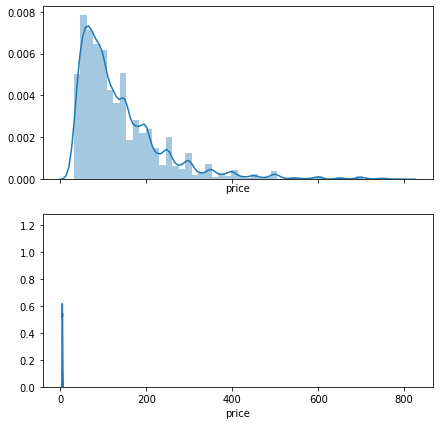

In [17]:
#Cuatro lineas de c�digo
f, axes = plt.subplots(2, figsize=(7, 7), sharex=True)
sns.distplot(data_filtered['price'],ax=axes[0])
sns.distplot(np.log1p(data_filtered['price']),ax=axes[1])

15. Finalmente, tenemos una variable de salida normalizada y sin ruido que mejorar� nuestras predicciones. Cambia la variable price por el log1p de price.


In [18]:
#Solo una l�nea de c�digo
data['price']=np.log1p(data_filtered['price'])

#### Exploraci�n de variables


Vamos a explorar un poco mas el resto de variables que pueden afectar al precio de una oferta. 

16. Empecemos por crear un histograma de las distintas zonas de la ciudad y la cantidad de ofertas en cada una de ellas (a lo mejor necesitas ampliar el gr�fico)

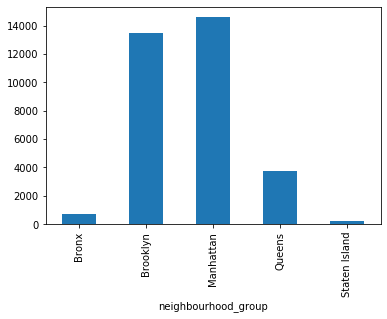

In [19]:
#Tres lineas de c�digo
plt.figure()
data.groupby('neighbourhood_group')['name'].count().plot(kind='bar')


17. Ahora crea un mapa de los apartamentos ofertados con la latitud y longitud (puntos extra si los coloreas por zonas o barrios). Lo mejor es hacerlo en un subplot y as� puedes controlar el tama�o del mapa.

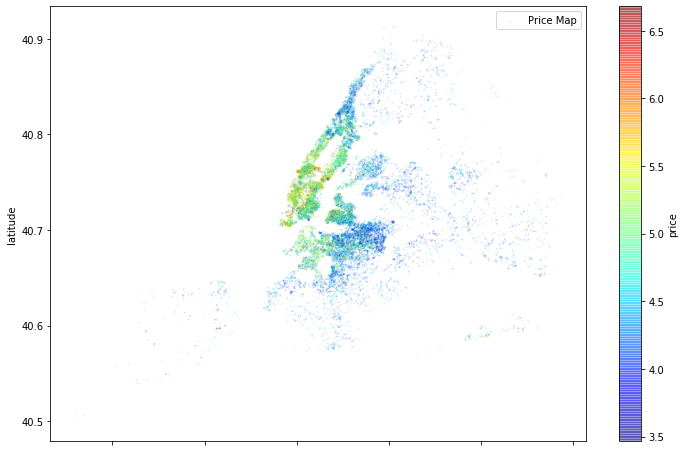

In [20]:
#Dos lineas de c�digo
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=data["price"]/100, 
             label="Price Map", c="price", figsize=(12,8),
             cmap=plt.get_cmap("jet"), colorbar=True)

18. Vamos ahora a generar otro histograma, esta vez con el tipo de habitaci�n ofertado (Tambi�n es buena idea ajustar el tama�o de la gr�fica).

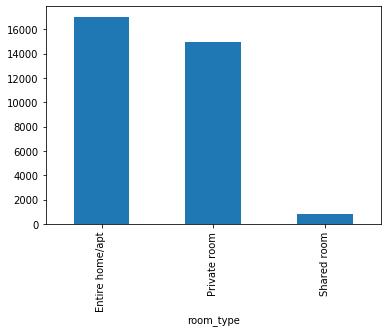

In [21]:
#Tres lineas de c�digo
plt.figure()
data.groupby('room_type')['name'].count().plot(kind='bar')

#### Transformaci�n de variables

Podemos aplicar el mismo proceso que le aplicamos a la variable price a nuestras variables de entrada y as� conseguir una distribuci�n mas c�moda para los m�todos de busqueda.

19. Aplica la transformaci�n log1p() a minimum_nights, generando las gr�ficas antes y despues y comp�ralas. 

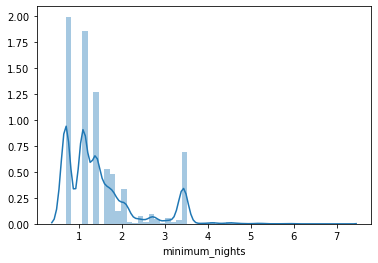

In [22]:
#Tres lineas de c�digo
#sns.distplot(data['minimum_nights'])
sns.distplot(np.log1p(data['minimum_nights']))

20. Finalmente, guarda minimum_nights como log1p de minimum_nights

In [23]:
#Solo una l�nea de c�digo.
data['price']=np.log1p(data['price'])

21. Repite el proceso, esta vez con reviews_per_month. �Es relevante la transformaci�n?

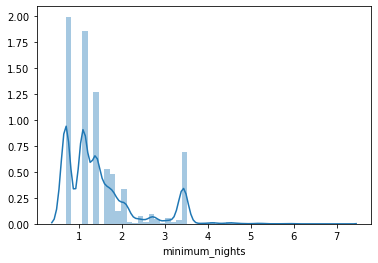

In [24]:
#Tres lineas de c�digo.
#sns.distplot(data['minimum_nights'])
sns.distplot(np.log1p(data['minimum_nights']))
data['minimum_nights']=np.log1p(data['minimum_nights'])

#### Estudio de la disponibilidad en n�mero de dias (0,365)

22. Vamos a empezar representando la disponibilidad en un distplot(). Como conocemos los limites de esta variable, lo mejor es limitar el intervalo de la gr�fica y hacerla mas grande.


(0, 365)

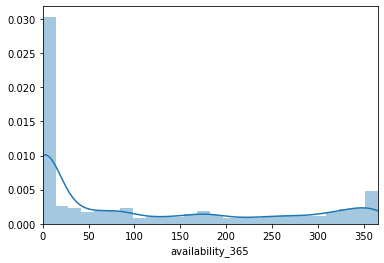

In [25]:
#Cuatro lineas de c�digo.
sns.distplot(data['availability_365'])
plt.xlim(0, 365)


#### A�adir variables artificiales

Se ha visto en el scatterplot anterior que parece haber dos grupos, uno disponible la mayor parte del a�o y otro solo unos pocos dias.

Tambi�n se intuye que aquellos sitios que no tengan reviews... Como que no dan mucha confi no? ;)

23. A�ade tres categorias que midan si el apartamento est� disponible todo el a�o, si su disponibilidad es muy baja (menor de 12 dias al a�o), y si no tiene reviews.

In [26]:
#Tres lineas de c�digo
data['low_availability']=np.where(data['availability_365']<12, 1, 0)
data['all_year_availability']=np.where(data['availability_365']==365, 1, 0)
data['no_reviews']=np.where(data['number_of_reviews']==0, 1, 0)





24. Vamos a generar un heatmap que muestre la relaci�n entre todas las variables de entrada y price. Utiliza corr() y la funci�n heatmap() de seaborn.

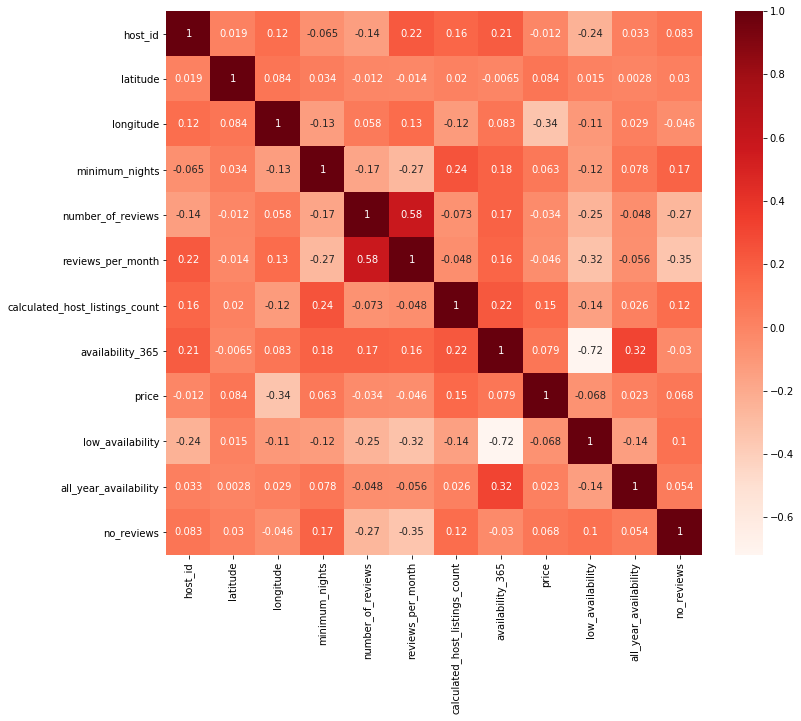

In [27]:
#Tres lineas de c�digo
plt.figure(figsize=(12,10))
cor=data.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)

#### Pasar variables categ�ricas a one_hot


25. Para hacer las features categ�ricas mas f�ciles de interpretar por el modelo, vamos a transformarlas en un OneHotEncoding. Utiliza la funci�n get_dummies() de pandas (te deber�an de quedar 241 columnas)

In [28]:
#Dos lineas de c�digo
df=pd.get_dummies(data, columns=['neighbourhood','neighbourhood_group','room_type'])
print (df.shape)

(32759, 240)


# Modelos, modelos, modelos

Hecha toda la exploraci�n, an�lisis y limpieza de datos, pasamos a la parte divertida: �Los modelos!
    
Empezamos importando todas las clases que vamos a necesitar para encontrar un buen modelo predictivo:

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score,  GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

26. Divide el dataset en X_train, X_test, y_train y y_test utilizando train_test_split(). No te olvides de no incluir price en el training set.

In [30]:
#Tres lineas de c�digo
df.dropna(inplace=True)
y=df.price
x=df.drop(['name','price','host_name','last_review'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,low_availability,all_year_availability,...,neighbourhood_Woodlawn,neighbourhood_Woodside,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
2981,249146659,40.70204,-73.93027,1.791759,1,0.36,1,364,0,0,...,0,0,0,1,0,0,0,0,1,0
18082,15377463,40.68525,-73.93159,1.098612,0,0.00,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
18075,5225104,40.68016,-73.91054,1.386294,19,1.23,1,28,0,0,...,0,0,0,1,0,0,0,1,0,0
15847,6980995,40.71312,-73.99669,0.693147,5,0.12,5,0,1,0,...,0,0,0,0,1,0,0,0,1,0
10782,31155262,40.71165,-73.94898,4.043051,0,0.00,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


27. Vamos a utilizar cross_validation para entrenar nuesto modelo, utilizando Kfold para hayar la score. Implementa un Kfold que realize 5 splits y calcula el error medio y la desviaci�n de un RandomForestRegressor sin cambiar sus par�metros (todav�a). [Pista](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

In [31]:
#Tres lineas de c�digo
rf = RandomForestRegressor(random_state=False, verbose=False)
rf.fit(x_train, y_train);
y_test=rf.predict(x_test)
scores = cross_val_score(rf, x_test, y_test, cv=5, scoring='neg_mean_squared_error')
print(scores)

[-0.00041797 -0.00054248 -0.00042021 -0.00051491 -0.00047617]


28. Al utilizar un RandomForestRegressor, �que hiperpar�metros estabamos utilizando?. Lista todos los par�metros que utiliza este modelo (utiliza la funci�n get_params() y la librer�a pprint)

In [32]:
from pprint import pprint
#Dos lineas de c�digo
params=rf.get_params()
pprint(params)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': False,
 'verbose': False,
 'warm_start': False}


Podemos ajustar todos estos pa�metros para mejorar la exactitud de nuestro modelo. Una forma de encontrar qu� combinaci�n funciona mejor es utilizar un GridSearchCV, que prueba modelos con muchas combinaciones distintas y calcula su score para encontrar el mejor modelo a fuerza bruta. Para esto, hay que pasar una lista de valores para cada par�metro, y GridSearchCV probar� con todos. [Mas informaci�n](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

29. Delimita que valores quieres que cada par�metro tenga, y incluye cada una de estas listas en un diccionario para poder ejecutar el GridSearchCV. Ten en cuenta los valores posibles para cada uno de los par�metros.

In [33]:
# 8 lineas de c�digo
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


30. Ahora ya podemos implementar un GridSearchCV. Para hacerlo mas r�pido, se utiliza una versi�n que no prueba con todas las combinaciones posibles, sino con unas cuantas de forma aleatorias.(de ah� su nombre, RandomizedSearchCV). Implementalo, teniendo en cuenta que tiene como parametros el modelo a ajustar y el diccionario que hemos definido antes, entre otros. Este paso puede durar unos minutos, ya que tiene que ajustar muchos modelos para encontrar el mejor. Aqu� est� la [documentaci�n](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) del RandomizedSearchCV.

In [ ]:
#Dos lineas de c�digo
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
scores = cross_val_score(rf_random, x_test, y_test, cv=5, scoring='neg_mean_squared_error')
print(scores)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


31. Para terminar, encuentra el mean squared error y $R^2$ del mejor modelo que hallas creado. 

In [ ]:
#Seis lineas de c�digo
score_mse = cross_val_score(rf, x_test, y_test, cv=5, scoring='neg_mean_squared_error')
score_r2 = cross_val_score(rf, x_test, y_test, cv=5, scoring='r2_score')

Ahora, �a mejorar esa score!
Puedes probar a:
- Eliminar features que no sean relevantes para la predicci�n
- Implementar Gradient boosting utilizando XBoost o Adaboost, entre otros
- Ajustar los hiperpar�metros manualmente para llegar a mejores modelos
- Utilizar un Tree Interpreter para ver qu� �rboles de decisi�n tienen mas importancia

Al acabar el challenge, os daremos un validation set para ver que grupo ha conseguido la mejor score. �Quien gane tiene premio!